In [4]:
# 수학시간~ㅋㅋㅋㅋㅋ

# sinusoidal: sin wave이런 음파 파형그래프 그런 것들
# phasor: 이런 sinusoidal을 만드는 것    

# 한바퀴 돌면 360도, 반바퀴돌면 180도인데 이렇게 표현하는걸 degrees 라고 함
# 0도를 0으로, 여기서부터 시작해 180도를 파이, 360도를 2*파이로 나타내는걸 radiants(rad) 라고 함



In [5]:
# 각도 개념 뿐만 아니라 초개념, 시간의 개념이 들어 있어야 실질적인 소리가 나올 수 있음

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

## Phasor

In [7]:
# parameter setting        (변수에다 값을 담아놓음)
amp = 1                   # range [0.0, 1.0]
sr = 10000                # sampling rate(표본추출률, 음질의 해상도를 의미함), Hz
dur = 0.5                 # in seconds (몇 초 동안 소리가 나는지)
freq = 880.0              # sine frequency, Hz

# sampling rate는 점들이 얼마나 1초에 많이 남아있는 것

In [8]:
# 각도값 만들어 내는 방법 (theta값 정의)
theta = np.arange(0, 2*np.pi, 0.1)         # 0부터 2pi까지 만든 것. 세번째 논항(?)인 0.1은 빽빽한 정도를 의미함. 쓰지 않았을 때보다 100배 빽빽하게 아래의 figure그래프가 만들어짐 
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [9]:
s = np.sin(theta)        # 위의 pi 이든 이 라인의 sin이든 그냥 가져오는게 아니라 np안에 있는걸 가져오는 것이므로 np.pi, np.sin 이라고 해줘야함
s                        # 벡터값이 나오는데 이걸 s에 받은 것!

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

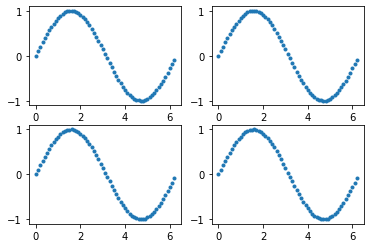

In [10]:
fig = plt.figure()           # 어떤 그림을 만들지 준비 (figure는 아래 결과값의 화면 전---체를 말함)
ax = fig.add_subplot(221)    # 화면 분리를 해서 subplot을 만든 것! 화면 분리부터 먼저 하고, 221의 뜻은 총 2 by 2로 화면을 분리한 후, 그 중 첫번째 것을 선택한다는 의미
ax.plot(theta, s, '.')       # theta는 우리가 0부터 2pi까지로 정의한 것이고, s 는 다시 sin이라는 function을 통해 나온 결과값 
ax = fig.add_subplot(222)    # 2 by 2 로 분리된 화면에서 2번째를 선택한다는 뜻
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)    #  2 by 2 로 분리된 화면에서 3번째를 선택한다는 뜻
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)    #  2 by 2 로 분리된 화면에서 4번째를 선택한다는 뜻
ax.plot(theta, s, '.')

Text(0, 0.5, 'value')

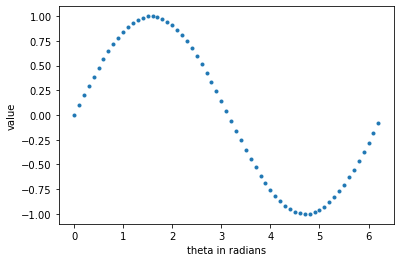

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)    
ax.plot(theta, s, '.')            # '.' 을 쓰지 않거나 '-'로 쓰면 그래프가 선으로 연결된다. default값도 선임!
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

# 이런 식으로 시험문제 나올 수 있음
# 아래 그래프는 line이 아니기 때문에 x축에서는 equisist 한데 y축에서는 equisist 하지 않다.(y축에는 equisistent한 성질이 반영되지 않는다)
# 위와 같은 것들은(non-linear라고 하면 됨)

# linear (line같이 생긴 것) x축에서 equisistent 하면 y축에서 봤을 때도 equisistent 하다. 
# x와 y의 관계가 line형태로 나타나면 linear 한것! 
# ax+b 를 제외한 모든 것은 non-linear하다!!!!!!


# 이 그래프들은 위에서 theta값을 range(0,2*np.pi) 로 해서 한바퀴만 도는건데, 여기서 10pi해주면 5번 도는거고 그런것@!!
# 근데 지금까지 한 그래프들은 시간개념이 없다는 것 기억하기! 하지만 소리는 시간이 반드시 필요하다. 시간도 설정해주어야함!!

In [22]:
t 0.0001 0.0002 0.0003 ... 0.5000    # 이렇게 내가 필요한 time들을 만들어 줘야함 (이게 time을 얼마나 잘게 쪼개서 하는가에 대한 해상도)
                                     # 이 숫자들이 작을 수록 정밀해진다는 뜻이므로 해상도가 높다
                                     # 0.5 까지 만드는 것이니까 duration이 0.5가 되어야 하는 것

SyntaxError: invalid syntax (<ipython-input-22-246c3a83e990>, line 1)

In [23]:
# 다음 두 줄이 가장 중요한 개념!! (generate time, generate phase)
# generate time
t = np.arange(1, sr * dur+1)/sr     # sr로 나눠주면 time 개념이 들어가는 것! 쭉 펼쳐놓고 이정도 해상도로 한다는 것을 표현
                                    # duration(dur)이 1초면 1초만큼, 0.5초면 0.5초만큼 타임틱이 만들어지는 것
                                    # arange함수가 마지막것을 제외시키니까 dur+1을 해줘서 마지막 것도 포함되게 하는 것!
    
    # theta에는 반드시 각도값을 넣어야 하는데, 각도값만으로는 소리를 실현해낼 수 없으므로 t을 만들어줘야함!
    # time 을 먼저 만들어줘야 함. 그래야 그 다음 과정인 generate phase에서 time을 연동시키는 것도 가능

In [24]:
t        # 결과에 array가 만들어지는데, e-0.4 = 1/10의 4승 = 1/10000, 따라서 1 * 1/10000, 2 * 1/10000, 3 * 1/10000... e-01은 1/10 이라는 뜻!

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [25]:
# generate phase
theta = t * 2*np.pi * freq     # np.pi = 그냥 파이(상수값)임. 근데 np안에 pi가 정의되어 있기 때문에 그냥 파이라고 쓰면 안되고 np.pi라고 써야함
                               # *freq가 없으면 그냥 한바퀴 돌고 끝나는 것. 근데 우리가 한바퀴만 돌자고 이걸 만들었나? ㄴㄴ 그래서 freq를 곱해주는 것!
                               # time 개념과 phase 개념 (theta개념)이 동시에 들어가는 것!

In [26]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)               # 이번에는 t이 연동된 theta의 값을 sin에 넣어 s에 할당한다!
                                    # 1112_ 지난시간에 빠진내용 보충: 여기서 amp를 곱해줌 (무슨의미?? 영상 초반 보기... 힝)

Text(0, 0.5, 'real')

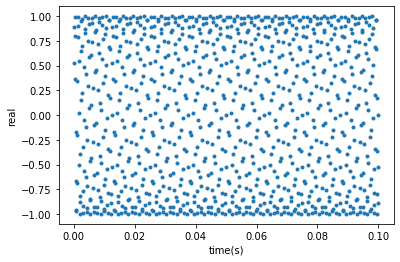

In [27]:
fig = plt.figure()        # 어떤 그림을 만들지 준비
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')        # 점을 총 1000개로 한다는 것임. 1000개 이렇게 점 갯수를 한정하지 않고 t와 s전체를 본다면 너무 촘촘해서 파형형태를 눈으로 볼 수 없기 때문! (궁금하면 한번 해보기~)
ax.set_xlabel('time(s)') # time 정보까지 연동했을 때는 x축에 굳이 theta값을 넣지 않음. 주기가 한바퀴 돌면 2pi고 두바퀴돌면 4pi고 이런건 너무 뻔하고, 실질적으로 소리가 나는 데는 시간이 더 필수적인 요소이므로 사간을 x축에 표시해 준다!
ax.set_ylabel('real')      

# 시험문제 나올 수 있는 것: 여기서 점의 개수는 몇개인가? 정확히 1000개!


In [28]:
# generate signal by complex-phasor
c = np.exp(theta * 1j)     # j는 복소수인 i와 같은 것
c

array([ 0.85099448+5.25174630e-01j,  0.44838322+8.93841424e-01j,
       -0.0878512 +9.96133609e-01j, ...,  0.44838322-8.93841424e-01j,
        0.85099448-5.25174630e-01j,  1.        +6.27613383e-14j])

Text(0.5, 0, 'imag')

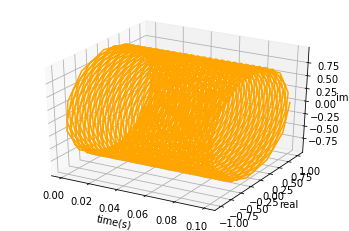

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000],'-',color='orange')   # 세 개의 입력이 들어가는데 
ax.set_xlabel('time(s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

# 위의 complex 벡터 값에서 다시 분할해서 각각 c, imag가 받아온다!   (강의유튜브 다시 보면서 개념 정확히 이해하기)
# 이거 마우스로 드래그하면 각도 돌려서 볼 수 있음ㅎㅎㅎ 예를 들어 허수부분 빼고 real과 time만 보고 싶으면 그렇게 돌려서 볼 수 있음

# 오일러 공식(en = cos+sini (?))에서 cos부분은 real(실수)부분와 관련, sin부분이 imaginary(허수)와 관련있다는 것을 명심하고 보기!


In [30]:
ipd.Audio(s, rate=sr)  # 여기서 sr(sampling rate)를 정의하지 않으면 소리의 실체가 없다!!!
                       # 위에서 100Hz 로 정의되어있는데 이러면 소리가 좀 낮게 남. 이걸 올리면 소리가 난다 !!!
                       # ipd도 위에서 input했기 때문에 쓸 수 있는 것!!

        # freq를 배수로 하면 옥타브 소리가 난다!!!

In [31]:
# 소리 나는게 어떻게 만들어지는지 숫자와 함께 연관지어서 배움 ! ㅎㅎ 이걸 예복습 잘 해보기 :0)

In [32]:
# 11주차_1112

In [33]:
# !pip install sounddevice    # 한 번 설치를 했으니 이제 굳이 또 실행할 필요 없기에 주석처리
import sounddevice as sd
sd.play(c.real, sr)

## Generate pulse train

In [34]:
# sampling rate와 연결된 개념 - Nyquist 주파수  아래 내용은 ★매우 중요★

# ex) sampling rate가 100Hz라고 생각해보자. 이 말은 우리가 1초에 표현할 수 있는 개수가 100개라는 뜻.
# 이 100개의 숫자를 가지고 1Hz를 표현할 수 있을까? YES!! (한 번의 sin wave의 주기가 있으면 된다.)
# 그렇다면 2Hz가 가능할까? 이것도 두번 왔다갔다 하면 되니까 가능하다.
# 그럼 10000Hz는 가능할까? 즉, 주어진 100개의 숫자 가지고 10000번을 왔다갔다 하게 하면 되는데, 가진 숫자(점)가 100개밖에 없으므로 이건 불가능!!
# 그리드노트 필기 참고 (나이퀴스트(Nyquist) 주파수 관련 내용)



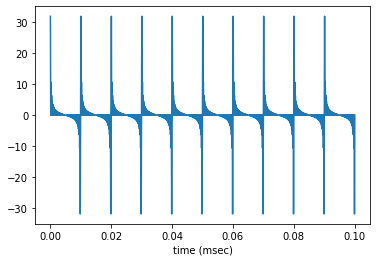

In [36]:
# generate samples, note conversion to float32 array 
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq     # freq만 바꾸는게 이 코드의 핵심!!
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000],s[0:1000]);
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate = sr)

In [37]:
# 점점 우리의 말소리와 비슷한 소리를 프로그램 상에서 어떻게 만들어 내는지를 배움!! ex) 아 소리를 어떻게 만드는지...
# 수업 젤 마지막에서는 스펙트로그램을 직접 만들어 볼 건데, purie theorem 이라는 수학적 원리를 이용해 만들어 볼 것임!!

In [38]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b